# Data Analysis Project 1 - (4th year)

### Introduction


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: Annual balance in euros for the client (numeric).
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
##### related with the last contact of the current campaign:
9. contact: contact communication type (categorical: 'cellular','telephone','unknown')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day: The last day the client was contacted (numeric)
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.
Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



## Importing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Importing the data
main=pd.read_csv("bank client.csv")
backup=pd.read_csv("bank client.csv")

In [ ]:
df=main.drop(['Id'],axis=1)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45199 non-null  float64
 1   job        45210 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45208 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.9+ MB


In [ ]:
# checking the shape of the dataset
df.shape

#the dataset has 145211 rows and 17 columns

(45211, 17)

## Data Preprocessing

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45199.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.933627,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.623149,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45210,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
#dividing features for catgorical and quantitative
#Dividing Categoricals and Quants
cats=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome']
quants=['age', 'balance','day','duration', 'campaign', 'pdays',
       'previous']

In [ ]:
#number of duplicates in dataset
df.duplicated().sum()
# no duplicates in dataset

0

In [ ]:
#Checking unique values in each variables with thier count percentage
for i in cats:
  print(i)
  print(df[i].value_counts(normalize=True))

job
job
blue-collar      0.215262
management       0.209202
technician       0.168016
admin.           0.114377
services         0.091882
retired          0.050077
self-employed    0.034926
entrepreneur     0.032891
unemployed       0.028821
housemaid        0.027428
student          0.020748
unknown          0.006370
Name: proportion, dtype: float64
marital
marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64
education
education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64
default
default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64
housing
housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64
loan
loan
no     0.839774
yes    0.160226
Name: proportion, dtype: float64
contact
contact
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: proportion, dtype: float64
month
month
may    0.304483
jul    0.15250

In [ ]:
#unique numbers in quants variables
for i in quants:
  print(i)
  print(df[i].unique())

age
[nan 47. 33. 35. 28. 58. 43. 41. 29. 53. 57. 51. 45. 60. 56. 32. 25. 40.
 44. 39. 52. 46. 36. 49. 59. 37. 50. 54. 55. 48. 31. 42. 30. 27. 34. 38.
 23. 26. 61. 22. 24. 21. 20. 66. 62. 83. 75. 67. 70. 65. 68. 64. 69. 72.
 71. 19. 76. 85. 63. 90. 82. 73. 74. 78. 80. 94. 79. 77. 86. 95. 81. 18.
 89. 84. 87. 92. 93. 88. -1.]
balance
[2.1430e+03 2.9000e+01 2.0000e+00 ... 8.2050e+03 1.4204e+04 1.6353e+04]
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
pdays
[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187

In [ ]:
#age has -1 cannot have ,drop the row which get age -1
df=df[df['age']!=-1]

In [ ]:
df[['pdays']].value_counts(normalize=True)

pdays
-1       0.817377
 182     0.003694
 92      0.003252
 91      0.002787
 183     0.002787
           ...   
 472     0.000022
 475     0.000022
 476     0.000022
 477     0.000022
 871     0.000022
Name: proportion, Length: 559, dtype: float64

There are lots of -1 that means client is not previously contacted

In [ ]:
#remove the row with previous column has more than 100
df=df[df['previous']<100]
#cthere is a value that 275 contact and second highest is 58, so its a spam so deleted

In [ ]:
# missing values for each coloumn
df.isnull().sum()

age          12
job           1
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [ ]:
#number of row atleast having one missing coloumn
df.isnull().any(axis=1).sum()

14

In [ ]:
#total number of rows in dataset
df.isnull().any(axis=1).sum()/df.shape[0]

0.0003096865529674608

ONLY 0.03% null so we have to drop those

In [ ]:
# dropping rows atleast have one null value
df=df.dropna()

In [ ]:
df.shape

(45193, 17)

In [ ]:
# missing values for each coloumn
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#if previously not contacted in campaing recording poutcome as nonexistent
df.loc[df['pdays']==-1,'poutcome']='nonexistent'

In [ ]:
df['poutcome'].value_counts(normalize=True)

poutcome
nonexistent    0.817339
failure        0.108424
other          0.040692
success        0.033434
unknown        0.000111
Name: proportion, dtype: float64

In [ ]:
#rename response y as subscribed
df.rename(columns={'y':'subscribed'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,nonexistent,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,nonexistent,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,nonexistent,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,nonexistent,no
10,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,nonexistent,no


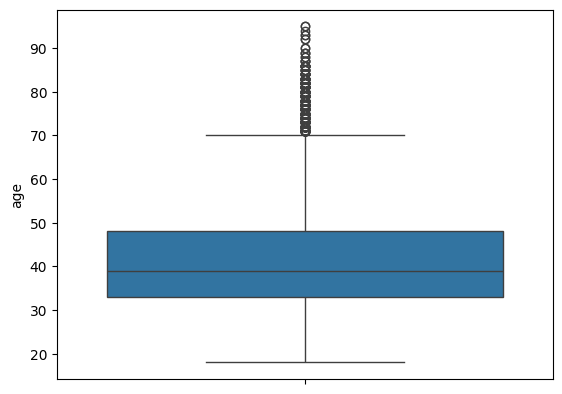

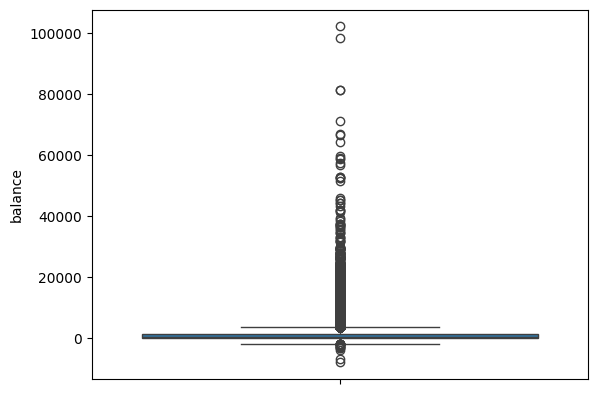

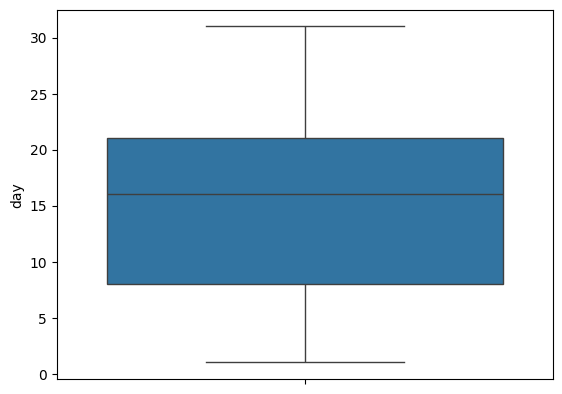

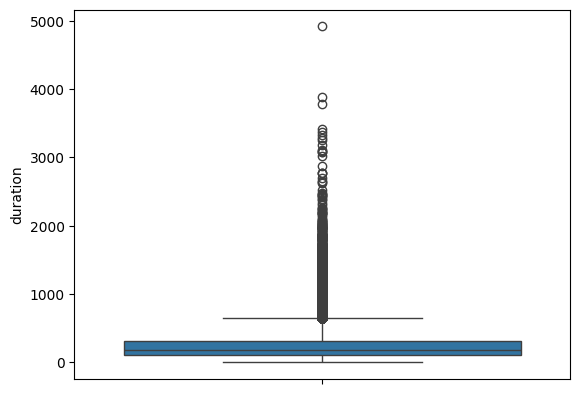

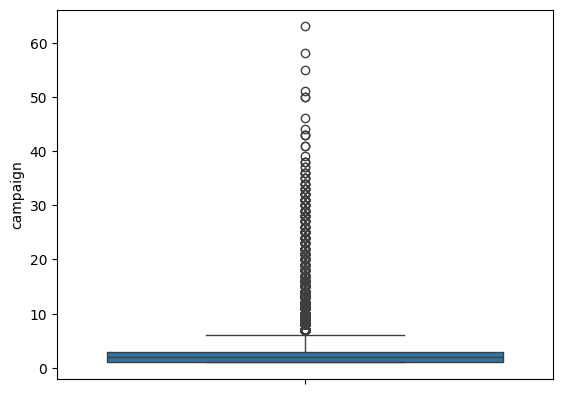

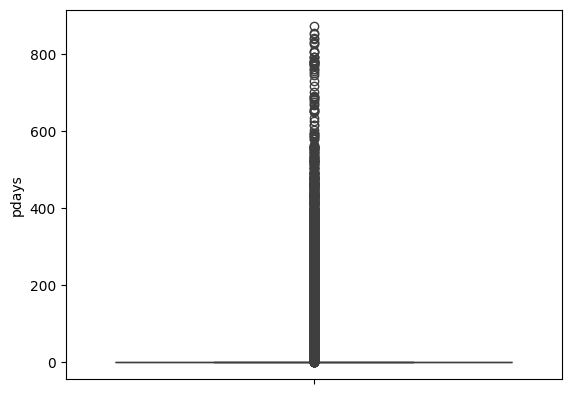

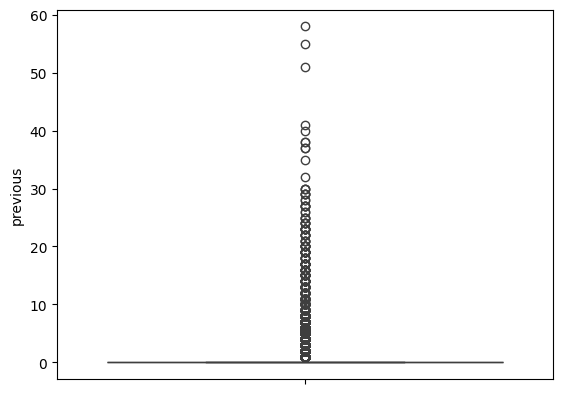

In [ ]:
#plotting individual box plot on categorical variables to initial checkinh of outliers
for i in quants:
  sns.boxplot(df[i])
  plt.show()

# **Multivariate Outlier detection for Mix Data**

In [ ]:
#Create copy of df without the outcome variable
df_copy=df.copy()
df_copy=df_copy.drop(['subscribed'], axis=1)

In [ ]:
#Change data type of 'job'
df_copy['day']=df_copy['day'].astype(object)

**DBScan**

In [ ]:
!pip install gower

In [ ]:
import gower

# Calculate the Gower distance matrix
gower_dist = gower.gower_matrix(df_copy)

# k= No.of dimensions * 2
k = 32

# Use NearestNeighbors with precomputed distance
neighbors = NearestNeighbors(n_neighbors=k, metric='precomputed')
neighbors_fit = neighbors.fit(gower_dist)
distances, indices = neighbors_fit.kneighbors(gower_dist)

# Sort distances to the k-th nearest neighbor
distances = np.sort(distances[:, k-1], axis=0)


NameError: name 'NearestNeighbors' is not defined

In [ ]:
# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to {}-th nearest neighbor'.format(k))
plt.axhline(y=0.025, color='r', linestyle='--')  # Add a horizontal line at the chosen epsilon
plt.grid(True)
plt.show()

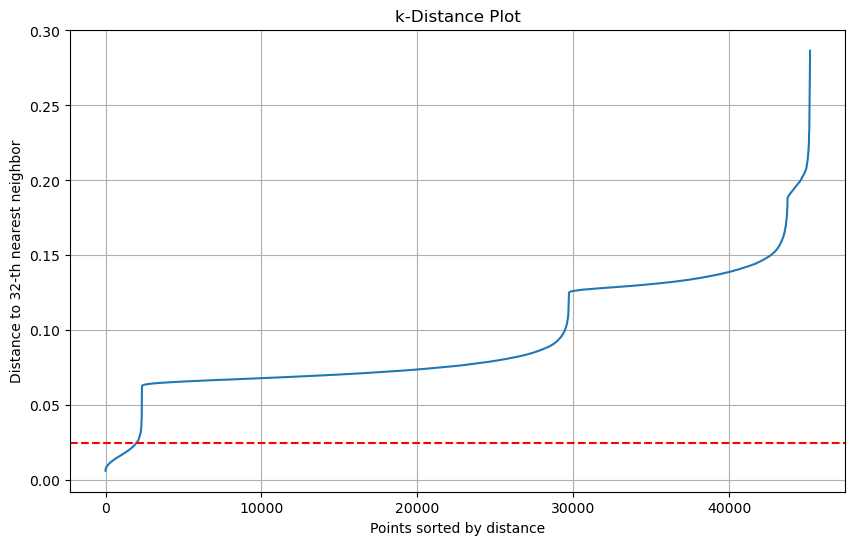

eps= 0.025  ,  min_samples= No. of dimensions * 2

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=32,metric='precomputed')
dbscan.fit(gower_dist)

In [ ]:
labels = dbscan.labels_
num_outliers = np.sum(labels == -1)

print("Number of outliers detected:", num_outliers)

In [ ]:
print("Percentage of outliers:", np.sum(labels == -1) / len(labels) * 100)

In [ ]:
# Remove outliers from the dataframe
df = df[labels != -1]


In [ ]:
# List of outlier indexes
outlier_indexes = [24044, 24506, 24596, 29721, 31616, 40410, 41380, 41885, 41890, 42442, 42489, 42558, 42746, 43171, 43301, 43308, 43931, 44061, 44636, 44647]


In [ ]:
df = df.drop(outlier_indexes)

In [ ]:
df.shape

(45193, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,nonexistent,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,nonexistent,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,nonexistent,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,nonexistent,no
10,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,nonexistent,no


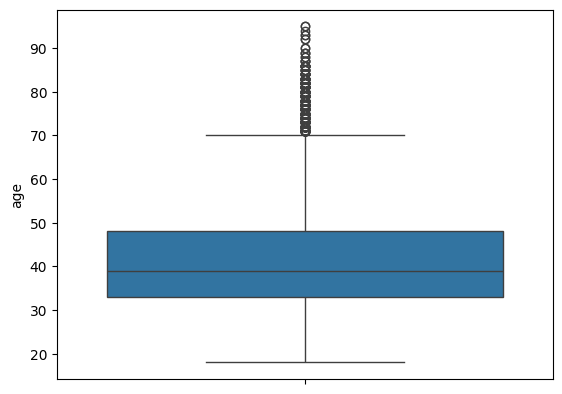

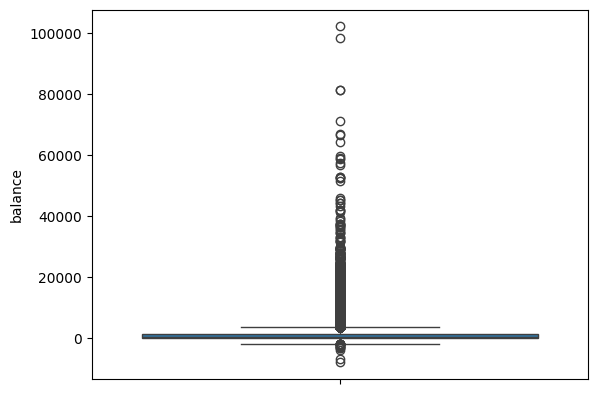

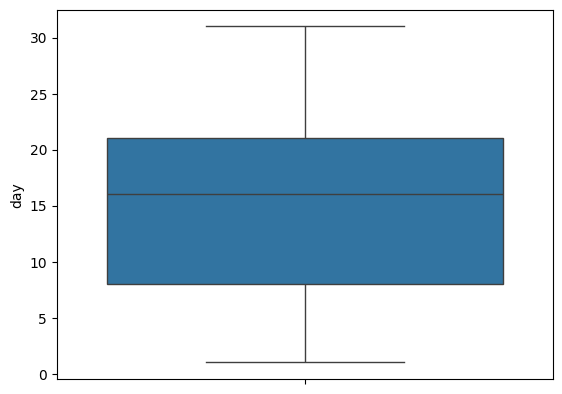

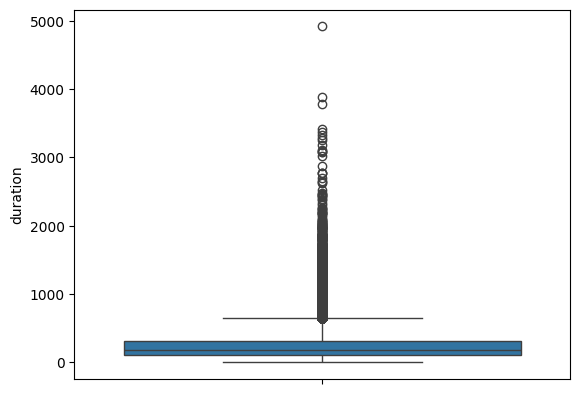

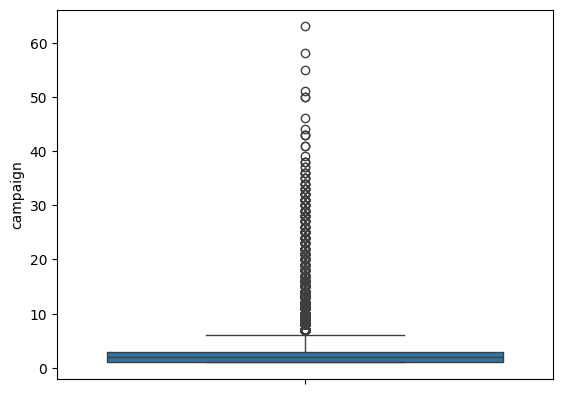

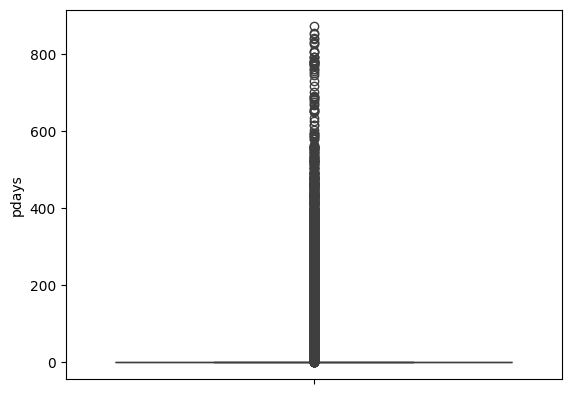

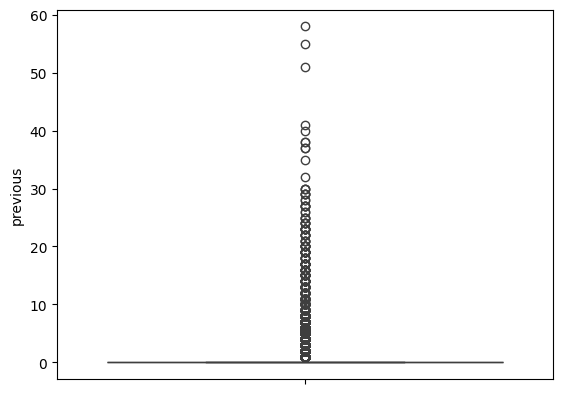

In [ ]:
for i in quants:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
# creating new column prev_contacted
df['prev_contacted']=np.where(df['pdays']==-1,"no","yes")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,nonexistent,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,nonexistent,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,nonexistent,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,nonexistent,no
10,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,nonexistent,no


## Train test split


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['subscribed'], random_state=123)


In [ ]:
df_train.shape

(36154, 18)

In [ ]:
df_train['subscribed'].value_counts(normalize=True)

subscribed
no     0.883028
yes    0.116972
Name: proportion, dtype: float64

In [ ]:
df_train.to_csv('df_train.csv', index=False)

In [ ]:
from google.colab import files

# Download the file
files.download('df_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA

### Response Variable - Subscribed




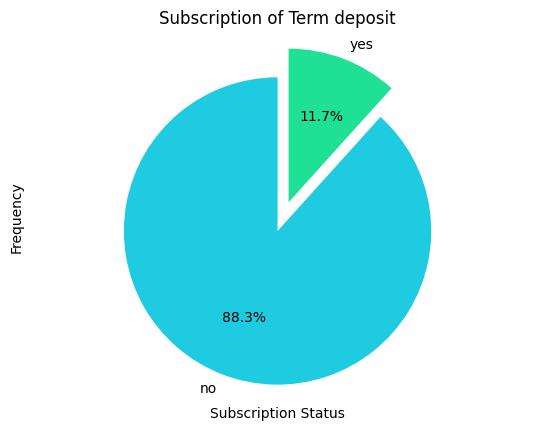

In [ ]:
# subscribed pie chart with percentages and titles and labels
frequency = df_train['subscribed'].value_counts()

fig, ax = plt.subplots()
ax.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90, explode=(0,0.2), colors=["#1ECBE1","#1EE196"])

# Add title and labels
ax.set_title('Subscription of Term deposit')
plt.xlabel('Subscription Status')
plt.ylabel('Frequency')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the pie chart
plt.show()

Only 11.7% of the customers in the marketing campaign subscribed to the term deposit, so this marketing campaign was somewhat unsuccessful.

In [ ]:
len(df_train)

36096

In [ ]:
df_train['subscribed']

22409    yes
23576     no
33513     no
6775      no
36126     no
        ... 
15595     no
5110      no
32944     no
9615      no
15047     no
Name: subscribed, Length: 36096, dtype: object

### Age


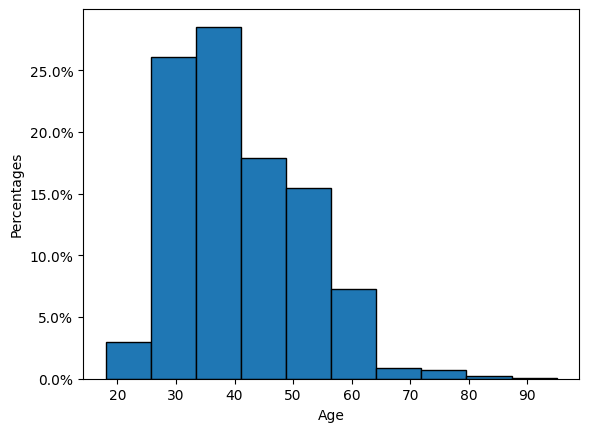

In [ ]:
## distribution of ages
from matplotlib. ticker import PercentFormatter
#create histogram, using percentages instead of counts
plt.hist(df_train['age'], weights=np. ones(len(df_train)) / len(df_train), edgecolor='black')
#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter (1))
plt.xlabel ( 'Age')
plt.ylabel ( 'Percentages')
plt.show()

Our histogram results show that the majority of our clients are in their 30’s and 40’s, representing over 50% of that age group.

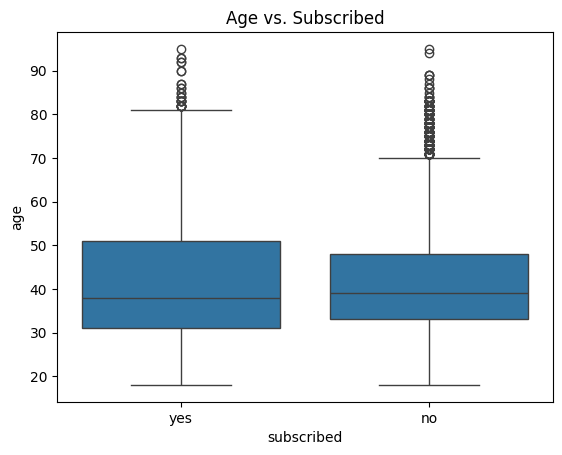

In [ ]:
# Age distribution with subscribed variable
sns.boxplot(x='subscribed', y='age', data=df_train)
plt.title("Age vs. Subscribed")
plt.show()

No clear pattern showed how the age status varies with the subscription status

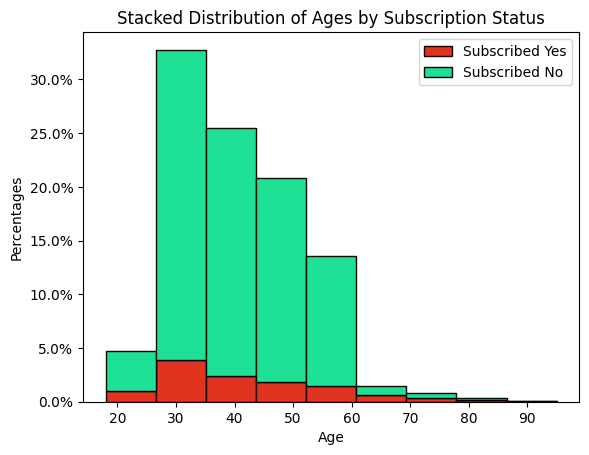

In [ ]:
subscribed_yes = df_train[df_train['subscribed'] == 'yes']
subscribed_no = df_train[df_train['subscribed'] == 'no']

# Create the bins for the histogram
bins = np.linspace(df_train['age'].min(), df_train['age'].max(), 10)

# Plot stacked histograms for subscription status
plt.hist([subscribed_yes['age'], subscribed_no['age']],
         weights=[np.ones(len(subscribed_yes)) / len(df_train), np.ones(len(subscribed_no)) / len(df_train)],
         bins=bins,
         color=["#E1341E","#1EE196"],
         label=['Subscribed Yes', 'Subscribed No'],
         stacked=True,
         edgecolor='black')

# Apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Age')
plt.ylabel('Percentages')
plt.title('Stacked Distribution of Ages by Subscription Status')
plt.legend(loc='upper right')
plt.show()


This also shows that no relationship between subscribed status and age

### marital

In [ ]:
marital_subscribed = df_train.groupby(['marital', 'subscribed']).size().unstack().fillna(0)

marital_subscribed_percentage = marital_subscribed.div(marital_subscribed.sum(axis=1), axis=0) * 100
marital_subscribed_percentage = marital_subscribed_percentage.reset_index()

job_subscribed_melted = marital_subscribed_percentage.melt(id_vars='marital', var_name='subscribed', value_name='percentage')

fig = px.bar(job_subscribed_melted, x='marital', y='percentage', color='subscribed',
             text='percentage',
             title='Distribution of Subscription Status by Job Type',
             labels={'marital': 'Marital Type', 'percentage': 'Percentage'},
             color_discrete_map={"yes": "#1ECBE1", "no": "#E1341E"},
             category_orders={'subscribed': ['yes', 'no']})
fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside', insidetextanchor='middle')


fig.update_layout(
    xaxis_title='Relationship Situation',
    yaxis_title='Percentage',
    xaxis_tickangle=45,

    yaxis=dict(range=[0, 100]),
    width=1000,
    height=700
)

fig.show()

 when considering percentages our cutomer base have more married customer, but for each maritarial status around 10-15% customers ar subscried so no relationship with maritarial status

### Job

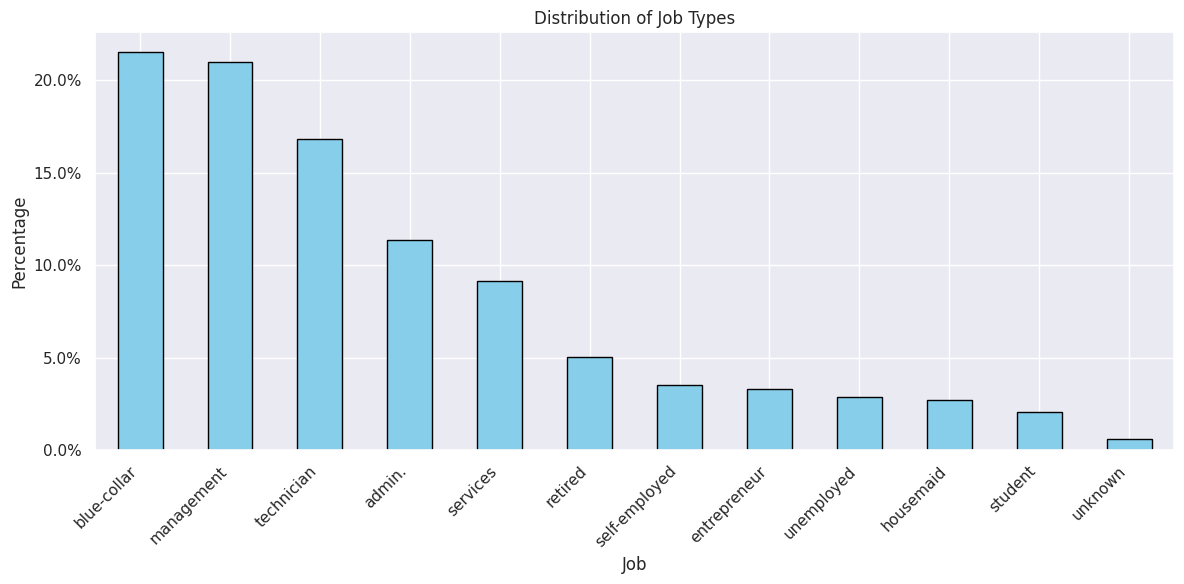

In [ ]:
#bar plot for job
job_counts = df_train['job'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.gca().yaxis.set_major_formatter(PercentFormatter(100))

plt.title('Distribution of Job Types')
plt.xlabel('Job')
plt.ylabel('Percentage')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Nearly 60% of customer tageted for this campaign is blue-collar, management and technician

In [ ]:
job_subscribed = df_train.groupby(['job', 'subscribed']).size().unstack().fillna(0)

job_subscribed_percentage = job_subscribed.div(job_subscribed.sum(axis=1), axis=0) * 100
job_subscribed_percentage = job_subscribed_percentage.reset_index()

job_subscribed_melted = job_subscribed_percentage.melt(id_vars='job', var_name='subscribed', value_name='percentage')

fig = px.bar(job_subscribed_melted, x='job', y='percentage', color='subscribed',
             text='percentage',
             title='Distribution of Subscription Status by Job Type',
             labels={'job': 'Job Type', 'percentage': 'Percentage'},
             color_discrete_map={"yes": "#1ECBE1", "no": "#E1341E"},
             category_orders={'subscribed': ['yes', 'no']})
fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside', insidetextanchor='middle')


fig.update_layout(
    xaxis_title='Job Type',
    yaxis_title='Percentage',
    xaxis_tickangle=45,

    yaxis=dict(range=[0, 100]),
    width=1000,
    height=700
)

fig.show()

retired and studets are more subscribed the term deposite, so target more of them in next marketing campaign

## education

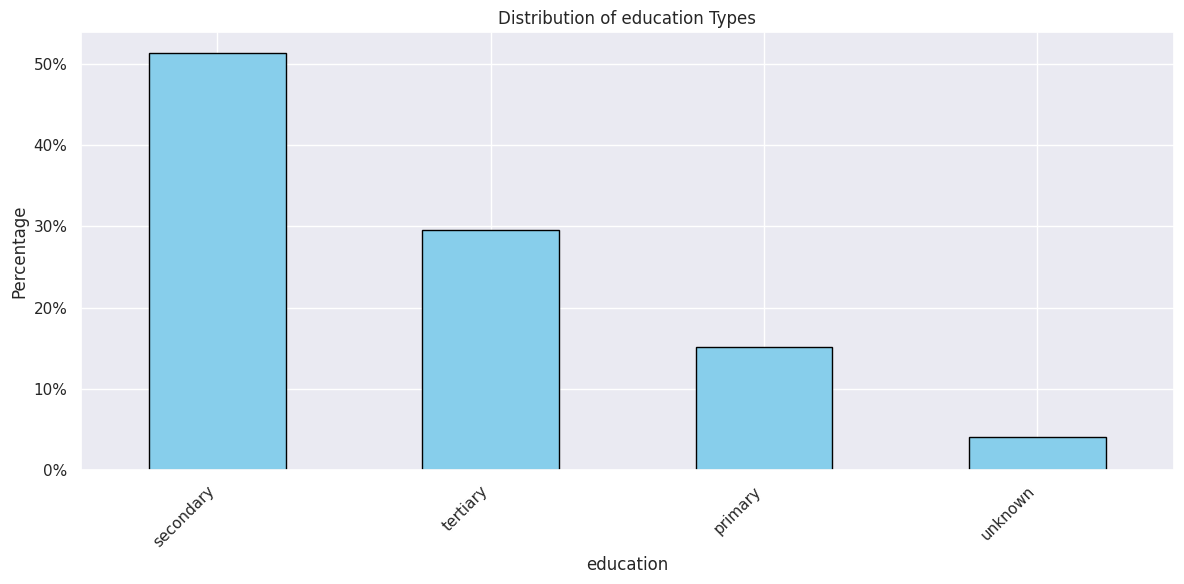

In [ ]:
#bar plot for education
job_counts = df_train['education'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.gca().yaxis.set_major_formatter(PercentFormatter(100))

plt.title('Distribution of education Types')
plt.xlabel('education')
plt.ylabel('Percentage')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bank targeted  more secondary eduction people

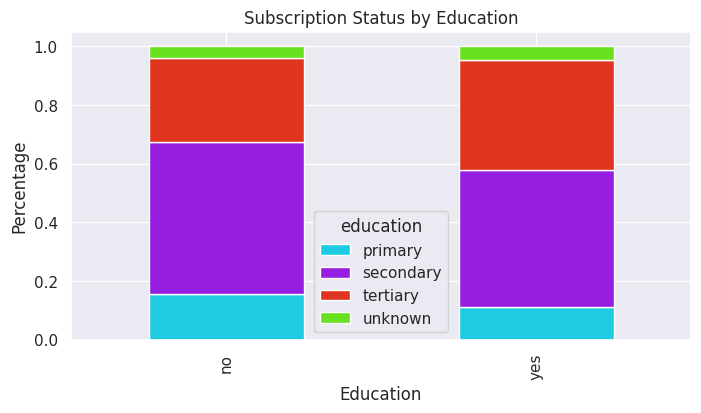

In [ ]:
Education = pd.crosstab(df_train['subscribed'],df_train['education'])
Education.div(Education. sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,4),color=["#1ECBE1","#961EE1","#E1341E","#6AE11E"])
plt.title('Subscription Status by Education')
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.show()

In [ ]:
pd.crosstab(df_train.subscribed,df_train.education,normalize='index',margins=True)

education,primary,secondary,tertiary,unknown
subscribed,,,,
no,0.157006,0.518611,0.284622,0.039761
yes,0.110795,0.468277,0.374053,0.046875
All,0.151605,0.512728,0.295075,0.040592


Clients with secondary education have the highest subscription rate (46%). Even though, the clients segment with tertiary education (38%) is not the education with the highest subscriptions, we can clearly see that the clients with secondary and tertiary level of education represent 84% of successful term deposit subscriptions, whereas unknown and primary represent 16%. Therefore, targeting clients with higher education is ideal

## default

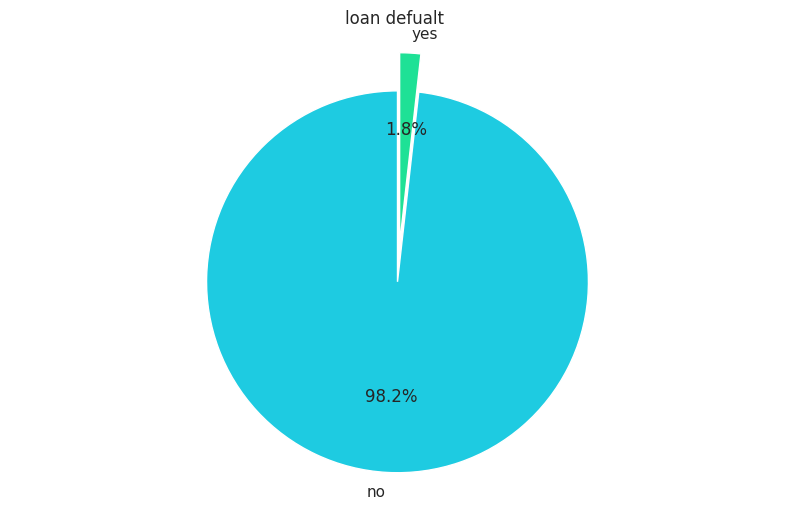

In [ ]:
frequency = df_train['default'].value_counts()

fig, ax = plt.subplots()
ax.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90, colors=["#1ECBE1","#1EE196"], explode=(0,0.2))

# Add title and labels
ax.set_title('loan defualt ')


# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the pie chart
plt.show()

this clearly shows bank mainly targeted the customers who are not loan defualt. since they are loyal customers to the bank.

## balance (Are we need to create new varible overdraft, then we have to drop balance, check RUWINDA)

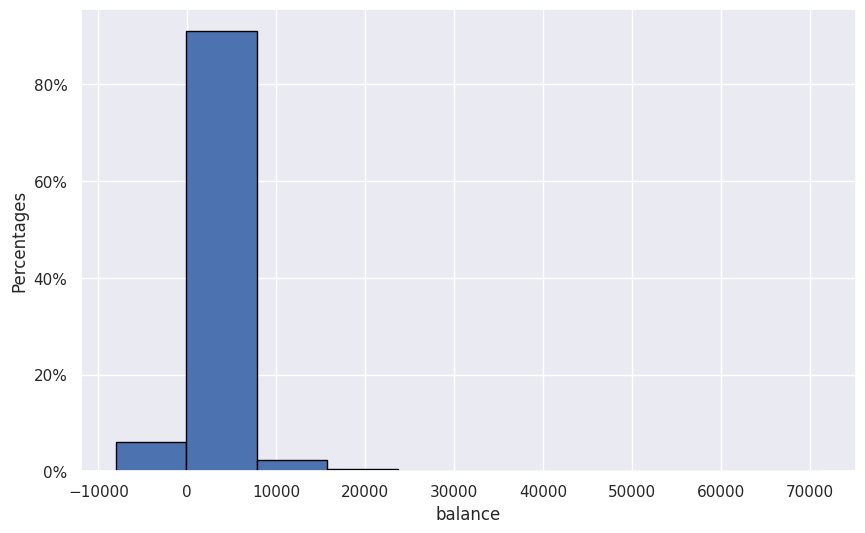

In [ ]:
## distribution of ages
from matplotlib. ticker import PercentFormatter
#create histogram, using percentages instead of counts
plt.hist(df_train['balance'], weights=np. ones(len(df_train)) / len(df_train), edgecolor='black')
#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter (1))
plt.xlabel ( 'balance')
plt.ylabel ( 'Percentages')
plt.show()

Seems to have negetive balance (overdraft) and very high balances,


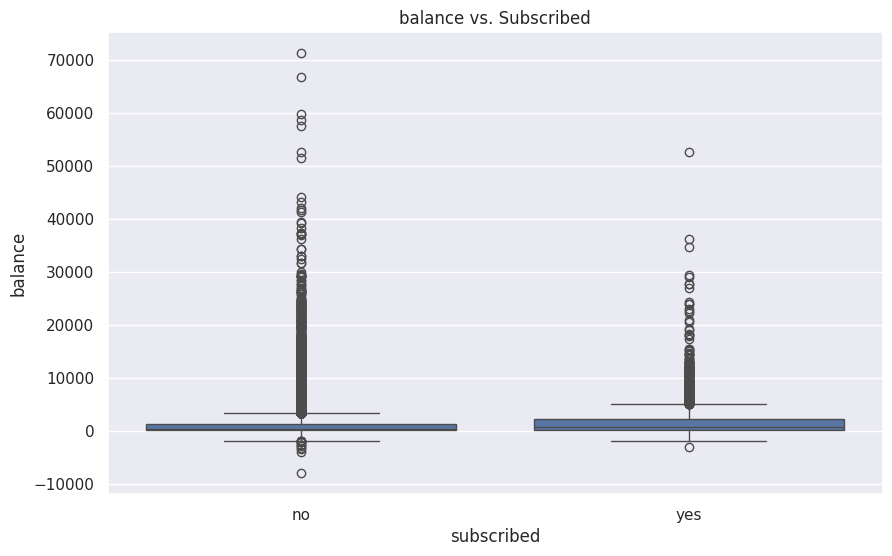

In [ ]:
# Age distribution with subscribed variable
sns.boxplot(x='subscribed', y='balance', data=df_train)
plt.title("balance vs. Subscribed")
plt.show()

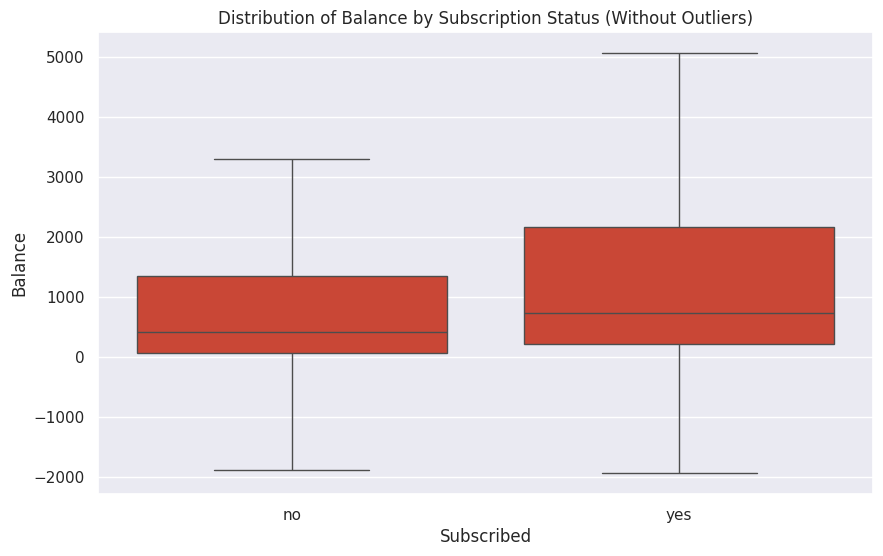

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='subscribed', y='balance', data=df_train, showfliers=False, color="#E1341E")

# Set title and axis labels
plt.title('Distribution of Balance by Subscription Status (Without Outliers)')
plt.xlabel('Subscribed')
plt.ylabel('Balance')

# Show the plot
plt.show()

High balce high likelihood to subscribe the loan

## housing


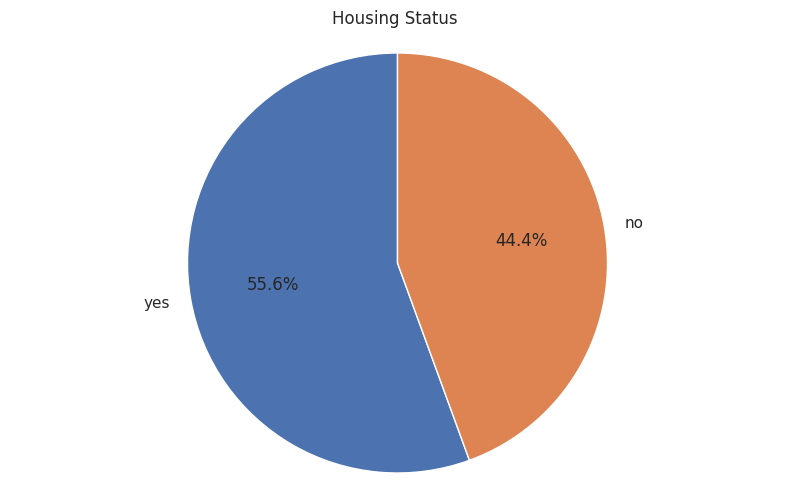

In [ ]:
frequency = df_train['housing'].value_counts()

fig, ax = plt.subplots()
ax.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90)

# Add title and labels
ax.set_title('Housing Status ')


# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the pie chart
plt.show()

In [ ]:
loan_subscribed = df_train.groupby(['housing', 'subscribed']).size().unstack().fillna(0)

loan_subscribed_percentage = loan_subscribed.div(loan_subscribed.sum(axis=1), axis=0) * 100
loan_subscribed_percentage = loan_subscribed_percentage.reset_index()

loan_subscribed_melted = loan_subscribed_percentage.melt(id_vars='housing', var_name='subscribed', value_name='percentage')

fig = px.bar(loan_subscribed_melted, x='housing', y='percentage', color='subscribed',
             text='percentage',
             title='Distribution of Subscription Status by Housing Status',
             labels={'housing': 'Housing Status', 'percentage': 'Percentage'},
             color_discrete_map={"yes": "#1ECBE1", "no": "#E1341E"},
             category_orders={'subscribed': ['yes', 'no']})

fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside', insidetextanchor='middle')


fig.update_layout(
    xaxis_title='Housing Status',
    yaxis_title='Percentage',
    xaxis_tickangle=0,
    yaxis=dict(range=[0, 100]),
    width=1000,
    height=600
)

# Show the plot
fig.show()

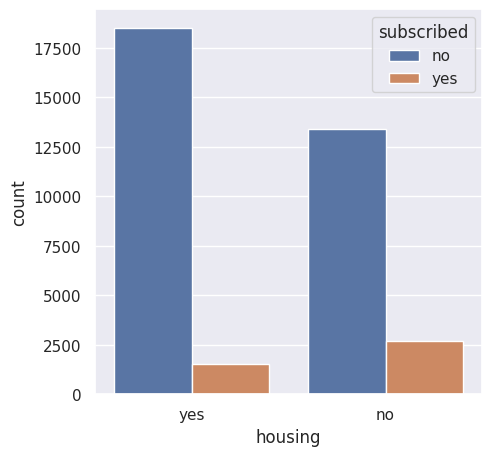

In [ ]:
sns.set(rc={'figure.figsize': (5,5)})
sns.color_palette("hls", 8)
bcd = sns.countplot(x='housing', hue='subscribed', data=df_train)
plt.show()

In [ ]:
pd. crosstab(df.subscribed,df_train.housing,normalize='index',margins=True)

housing,no,yes
subscribed,,
no,0.419476,0.580524
yes,0.632339,0.367661
All,0.444355,0.555645


According to our results, 63% of clients who subscribed to a term deposit do not have housing loans. Therefore, our hypothesis in which clients who do not have outstanding loans (personal and housing loans) are more likely to subscribe to a term deposit is correct.

# Loan

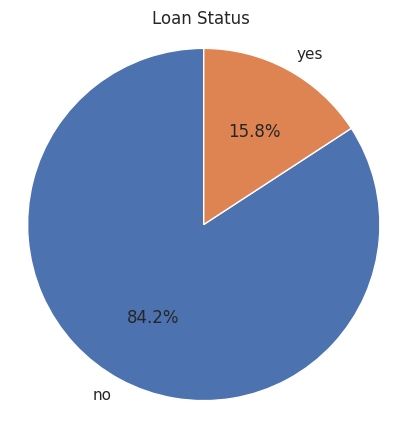

In [ ]:
frequency = df_train['loan'].value_counts()

fig, ax = plt.subplots()
ax.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90)

# Add title and labels
ax.set_title('Loan Status ')


# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the pie chart
plt.show()

In [ ]:
import pandas as pd


loan_subscribed = df_train.groupby(['loan', 'subscribed']).size().unstack().fillna(0)

loan_subscribed_percentage = loan_subscribed.div(loan_subscribed.sum(axis=1), axis=0) * 100
loan_subscribed_percentage = loan_subscribed_percentage.reset_index()  # Reset index for Plotly

loan_subscribed_melted = loan_subscribed_percentage.melt(id_vars='loan', var_name='subscribed', value_name='percentage')

fig = px.bar(loan_subscribed_melted, x='loan', y='percentage', color='subscribed',
             text='percentage',
             title='Distribution of Subscription Status by Loan Status',
             labels={'loan': 'Loan Status', 'percentage': 'Percentage'},
             color_discrete_map={"yes": "#1ECBE1", "no": "#E1341E"},
             category_orders={'subscribed': ['yes', 'no']})

fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside', insidetextanchor='start')

fig.update_layout(
    xaxis_title='Loan Status',
    yaxis_title='Percentage',
    xaxis_tickangle=-45,
    yaxis=dict(range=[0, 100]), ]
    width=800,
    height=500
)

fig.show()


## contact

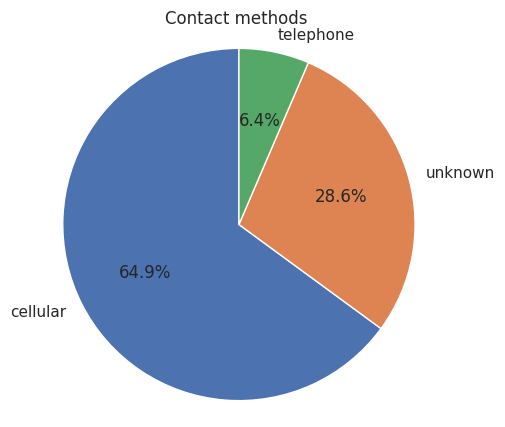

In [ ]:
frequency = df_train['contact'].value_counts()

fig, ax = plt.subplots()
ax.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90)

# Add title and labels
ax.set_title('Contact methods ')


# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the pie chart
plt.show()

Durinmg the campaign most are contacted with cellular

In [ ]:
contact_subscribed = df_train.groupby(['contact', 'subscribed']).size().unstack().fillna(0)

contact_subscribed_percentage = contact_subscribed.div(contact_subscribed.sum(axis=1), axis=0) * 100
contact_subscribed_percentage = contact_subscribed_percentage.reset_index()  # Reset index for Plotly

contact_subscribed_melted = contact_subscribed_percentage.melt(id_vars='contact', var_name='subscribed', value_name='percentage')

fig = px.bar(contact_subscribed_melted, x='contact', y='percentage', color='subscribed',
             text='percentage',
             title='Distribution of Subscription Status by Contact Status',
             labels={'contact': 'Contact Status', 'percentage': 'Percentage'},
             color_discrete_map={"yes": "#1ECBE1", "no": "#E1341E"},
             category_orders={'subscribed': ['yes', 'no']})  # Ensure 'yes' is at the bottom

fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside', insidetextanchor='start')

fig.update_layout(
    xaxis_title='Contact Status',
    yaxis_title='Percentage',
    xaxis_tickangle=0,
    yaxis=dict(range=[0, 100]),
    width=800,
    height=500
)

fig.show()

telephone and cellular both having same yes percentage

## month

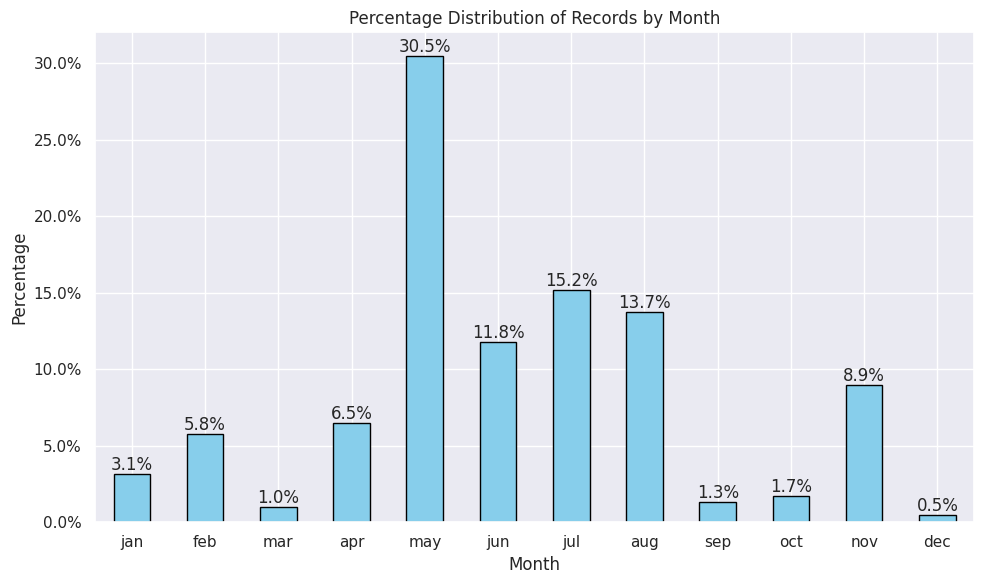

In [ ]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_train['month'] = pd.Categorical(df_train['month'], categories=month_order, ordered=True)

month_distribution = df_train['month'].value_counts(normalize=True).sort_index() * 100

ax = month_distribution.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', label_type='edge')

plt.title('Percentage Distribution of Records by Month')
plt.xlabel('Month')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(PercentFormatter(100))

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


More contacted in may,jun,jul,aug, 1st quarter, starting of financial year, more funds for marketing?

In [ ]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_train['month'] = pd.Categorical(df_train['month'], categories=month_order, ordered=True)

month_subscribed = df_train.groupby(['month', 'subscribed']).size().unstack().fillna(0)
month_subscribed_percentage = month_subscribed.div(month_subscribed.sum(axis=1), axis=0) * 100

month_subscribed_percentage = month_subscribed_percentage[['yes', 'no']].reset_index()

month_subscribed_melted = month_subscribed_percentage.melt(id_vars='month', var_name='subscribed', value_name='percentage')

fig = px.bar(month_subscribed_melted, x='month', y='percentage', color='subscribed',
             text='percentage',
             title='Distribution of Subscription Status by Month',
             labels={'month': 'Month', 'percentage': 'Percentage'},
             color_discrete_map={"yes": "#1ECBE1", "no": "#E1341E"},
             category_orders={'month': month_order, 'subscribed': ['yes', 'no']})

fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside', insidetextanchor='middle')

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Percentage',
    yaxis=dict(range=[0, 100]),
    width=1000,
    height=600
)

fig.show()



March, Sep, OCt and Dec contacting more likelihood to subscribe the term deposite.

## duration

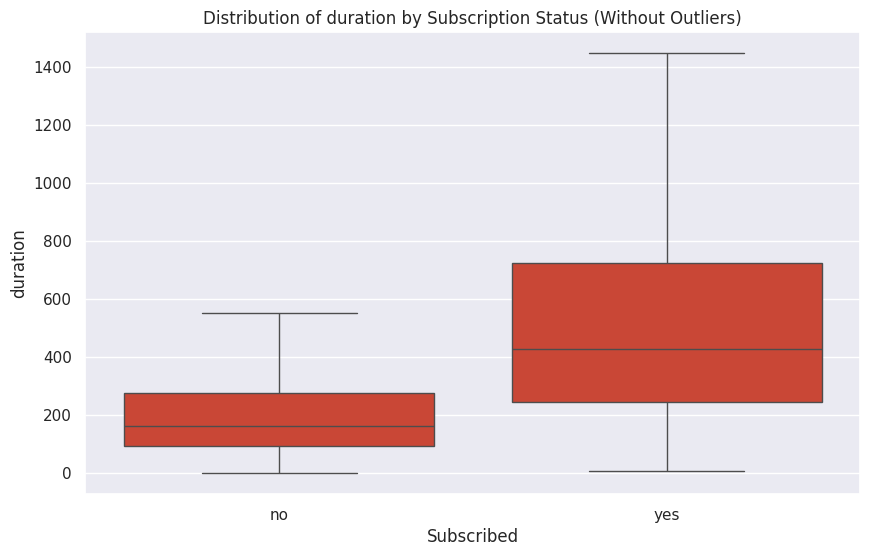

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='subscribed', y='duration', data=df_train, showfliers=False, color="#E1341E")

# Set title and axis labels
plt.title('Distribution of duration by Subscription Status (Without Outliers)')
plt.xlabel('Subscribed')
plt.ylabel('duration')

# Show the plot
plt.show()

If call duration is high clear likelihood for term deposite

## campaign

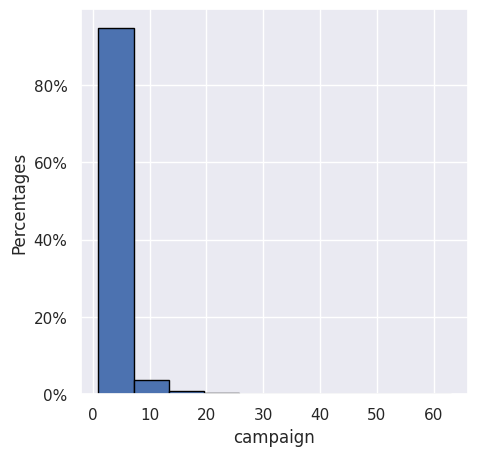

In [ ]:
## distribution of campaign
from matplotlib. ticker import PercentFormatter
#create histogram, using percentages instead of counts
plt.hist(df_train['campaign'], weights=np. ones(len(df_train)) / len(df_train), edgecolor='black')
#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter (1))
plt.xlabel ( 'campaign')
plt.ylabel ( 'Percentages')
plt.show()

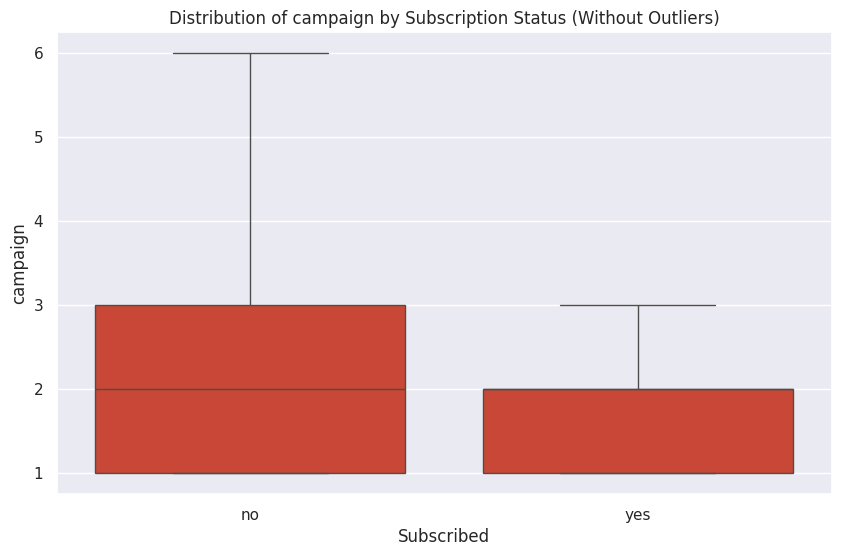

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='subscribed', y='campaign', data=df_train, showfliers=False,color="#E1341E")

# Set title and axis labels
plt.title('Distribution of campaign by Subscription Status (Without Outliers)')
plt.xlabel('Subscribed')
plt.ylabel('campaign')

# Show the plot
plt.show()

In [ ]:
df_train.groupby('subscribed')['campaign'].describe()

,count,mean,std,min,25%,50%,75%,max
subscribed,,,,,,,,
no,31916.0,2.838952,3.207260,1.0,1.0,2.0,3.0,63.0
yes,4224.0,2.146070,1.943244,1.0,1.0,2.0,2.0,32.0


No relationship with campings

## prev_contacted


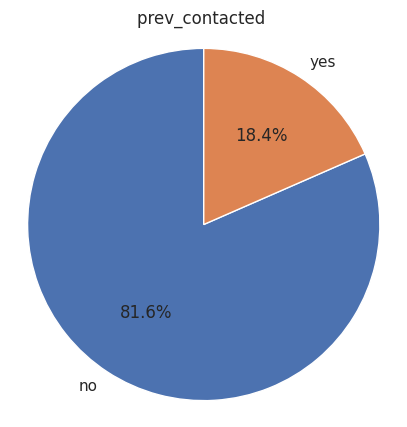

In [ ]:
frequency = df_train['prev_contacted'].value_counts()

fig, ax = plt.subplots()
ax.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90)

# Add title and labels
ax.set_title('prev_contacted ')


# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the pie chart
plt.show()

Bank try to approch more new customers who are not previously contacted in marketing campign

In [ ]:
contact_subscribed = df_train.groupby(['prev_contacted', 'subscribed']).size().unstack().fillna(0)
contact_subscribed_percentage = contact_subscribed.div(contact_subscribed.sum(axis=1), axis=0) * 100

contact_subscribed_percentage = contact_subscribed_percentage[['yes', 'no']].reset_index()

contact_subscribed_melted = contact_subscribed_percentage.melt(id_vars='prev_contacted', var_name='subscribed', value_name='percentage')

fig = px.bar(contact_subscribed_melted, x='prev_contacted', y='percentage', color='subscribed',
             text='percentage',
             title='Distribution of Subscription Status by Previous Contact Status',
             labels={'prev_contacted': 'Previous Contact Status', 'percentage': 'Percentage'},
             color_discrete_map={"yes": "#1ECBE1", "no": "#E1341E"},
             category_orders={'subscribed': ['yes', 'no']})


fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside', insidetextanchor='middle')


fig.update_layout(
    xaxis_title='Previous Contact Status',
    yaxis_title='Percentage',
    yaxis=dict(range=[0, 100]),
    width=1000,
    height=600
)

fig.show()


More percentage if previously contacted cutomer subscribed, thust build towards bank

## pdays (only consider customers with previously contacted)

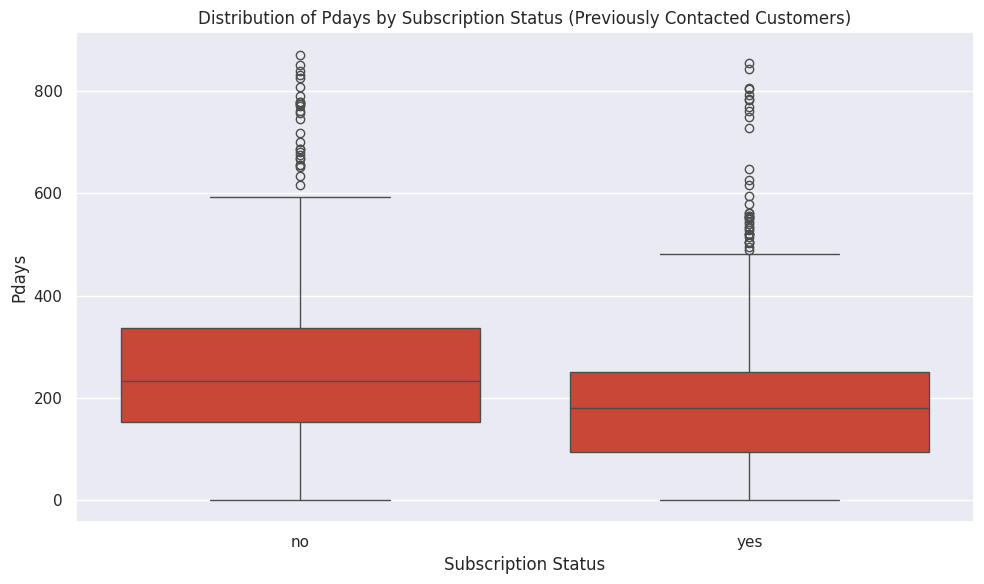

In [ ]:
contacted_customers = df_train[df_train['prev_contacted'] == 'yes']

sns.set(rc={'figure.figsize': (10, 6)})
sns.boxplot(x='subscribed', y='pdays', data=contacted_customers, color="#E1341E")

plt.title('Distribution of Pdays by Subscription Status (Previously Contacted Customers)')
plt.xlabel('Subscription Status')
plt.ylabel('Pdays')

plt.tight_layout()
plt.show()

If shorter time period contacted again more likelihood for subscribed

## previous (only consider customers with previously contacted)

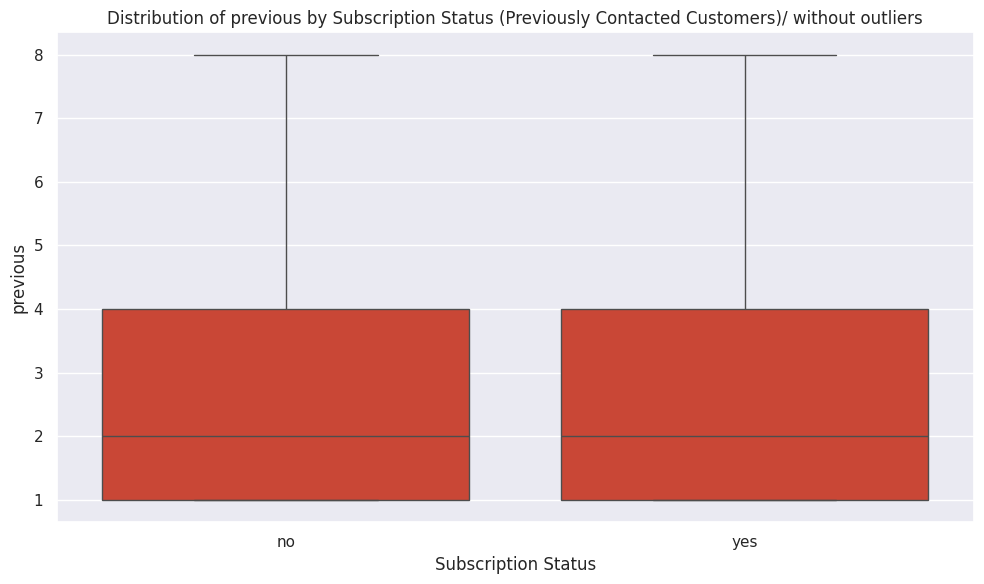

In [ ]:
contacted_customers = df_train[df_train['prev_contacted'] == 'yes']

sns.set(rc={'figure.figsize': (10, 6)})
sns.boxplot(x='subscribed', y='previous', data=contacted_customers,showfliers=False,color="#E1341E")

plt.title('Distribution of previous by Subscription Status (Previously Contacted Customers)/ without outliers')
plt.xlabel('Subscription Status')
plt.ylabel('previous')

plt.tight_layout()
plt.show()

No variations

#poutcome (only consider customers with previously contacted)

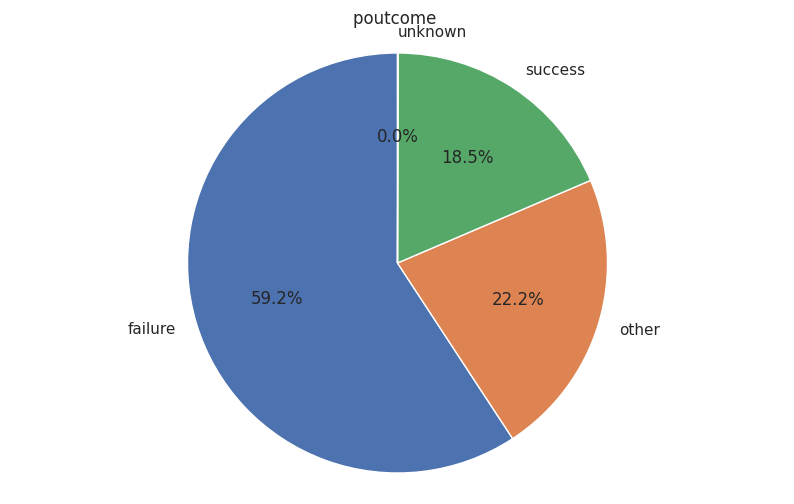

In [ ]:
contacted_customers = df_train[df_train['prev_contacted'] == 'yes']
frequency = contacted_customers['poutcome'].value_counts()

fig, ax = plt.subplots()
ax.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90)

# Add title and labels
ax.set_title('poutcome ')


# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the pie chart
plt.show()

overall previous campain is uncessuful

In [ ]:
contacted_customers = df_train[df_train['prev_contacted'] == 'yes']

poutcome_subscribed = contacted_customers.groupby(['poutcome', 'subscribed']).size().unstack().fillna(0)
poutcome_subscribed_percentage = poutcome_subscribed.div(poutcome_subscribed.sum(axis=1), axis=0) * 100

poutcome_subscribed_percentage = poutcome_subscribed_percentage[['yes', 'no']].reset_index()

poutcome_subscribed_melted = poutcome_subscribed_percentage.melt(id_vars='poutcome', var_name='subscribed', value_name='percentage')

fig = px.bar(poutcome_subscribed_melted, x='poutcome', y='percentage', color='subscribed',
             text='percentage',
             title='Distribution of Subscription Status by Previous Outcome (Previously Contacted Customers)',
             labels={'poutcome': 'Previous Outcome', 'percentage': 'Percentage'},
             color_discrete_map={"yes": "#1ECBE1", "no": "#E1341E"},
             category_orders={'subscribed': ['yes', 'no']})

fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside', insidetextanchor='middle')

fig.update_layout(
    xaxis_title='Previous Outcome',
    yaxis_title='Percentage',
    yaxis=dict(range=[0, 100]),
    width=1000,
    height=600
)

fig.show()

loyal customer base

## Combining Univariate EDA's

# Numerical EDA

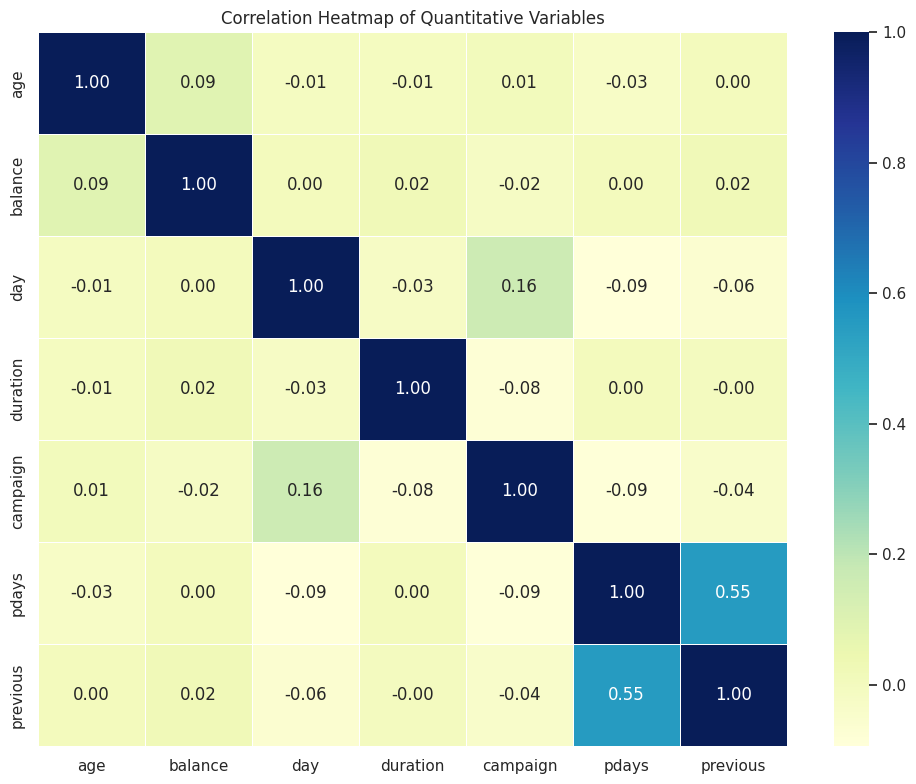

In [ ]:
quant_df = df_train[quants]

corr_matrix = quant_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Quantitative Variables')
plt.tight_layout()
plt.show()


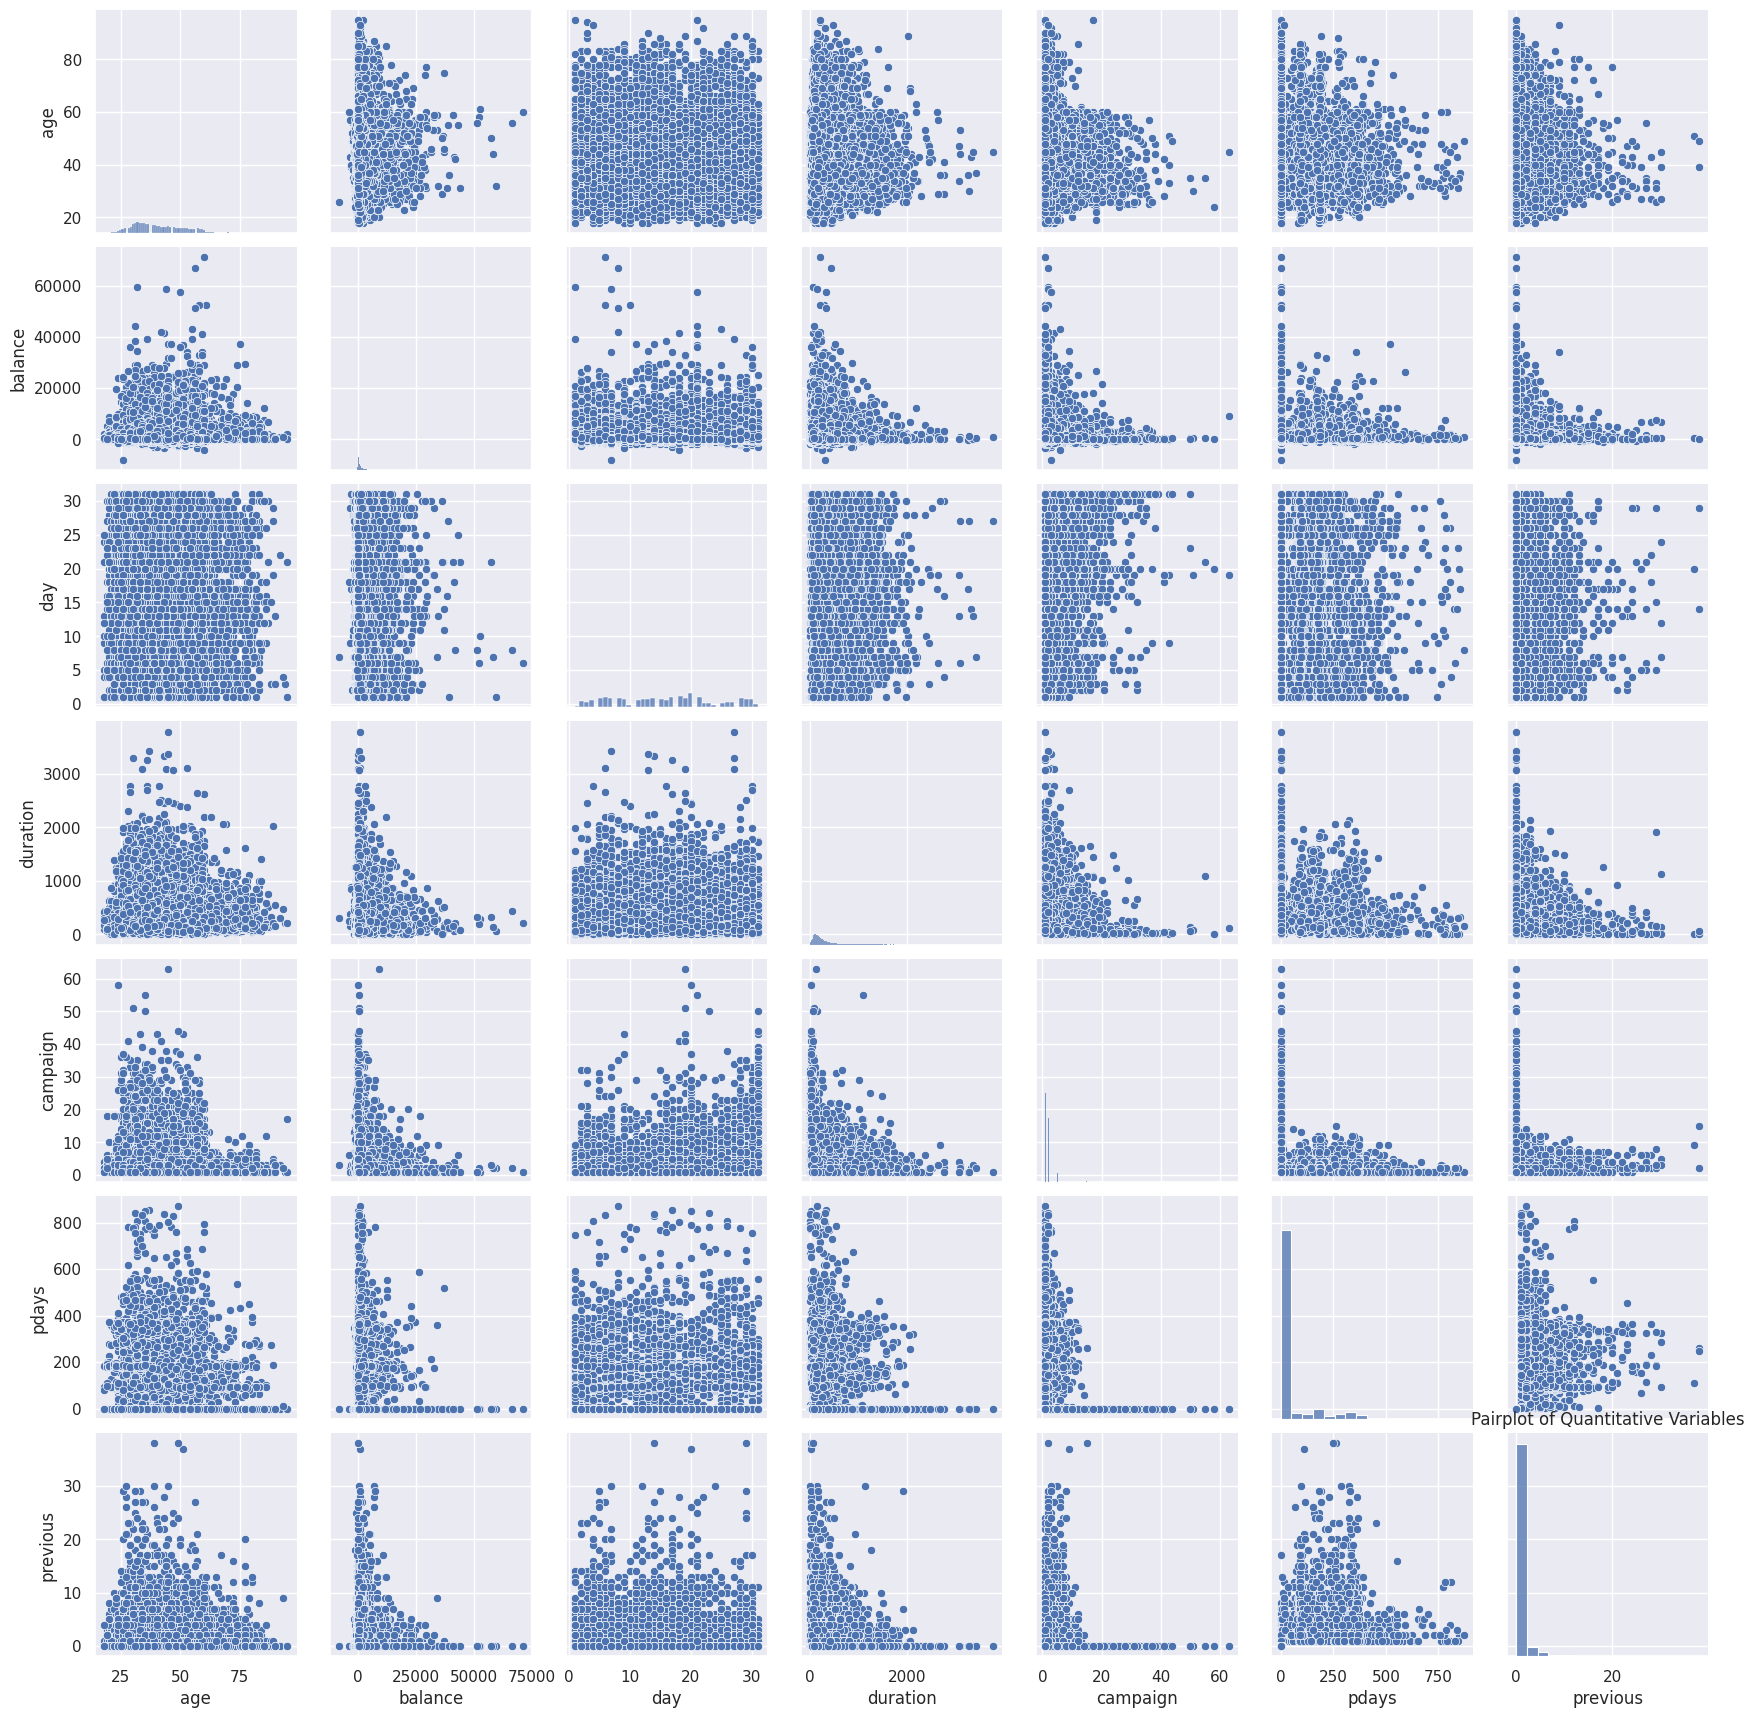

In [ ]:
sns.pairplot(quant_df)
plt.title("Pairplot of Quantitative Variables")
plt.show()

no much multicollinerity with quanititive predictors but pdays and previous are somewhat highly correlated

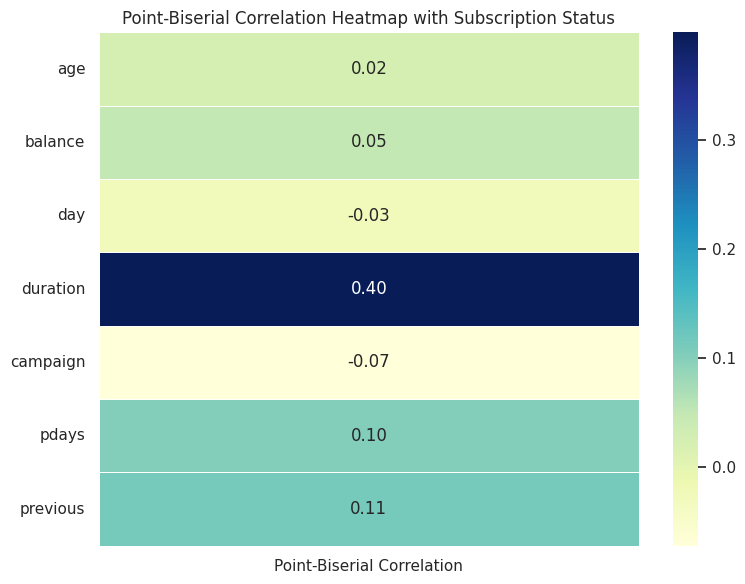

In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr

df_train['subscribed'] = df_train['subscribed'].apply(lambda x: 1 if x == 'yes' else 0)

correlations = {}
for predictor in quants:
    correlation, _ = pointbiserialr(df_train[predictor], df_train['subscribed'])
    correlations[predictor] = correlation

corr_df = pd.DataFrame(correlations.values(), index=correlations.keys(), columns=['Point-Biserial Correlation'])

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Point-Biserial Correlation Heatmap with Subscription Status')
plt.tight_layout()
plt.show()

duration have higher relationship, others not showing much relationship

In [ ]:
cats.append('prev_contacted')


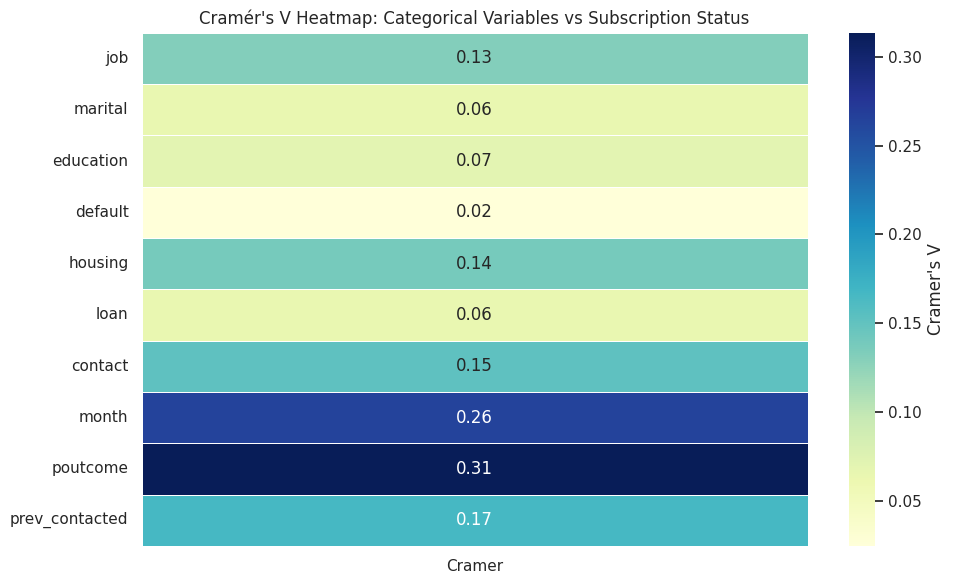

In [ ]:

from scipy.stats import chi2_contingency

def cramers_v(chi2, n, k):
    return np.sqrt(chi2 / (n * (k - 1)))

# Initialize a DataFrame to store Cramer's V values
cramers_v_matrix = pd.DataFrame(index=cats, columns=['Cramer'])

# Calculate Cramer's V for each categorical variable with the binary response variable
for var in cats:
    # Create contingency table
    contingency_table = pd.crosstab(df_train[var], df_train['subscribed'])
    # Perform Chi-Square test
    chi2_stat, _, _, _ = chi2_contingency(contingency_table)
    # Number of observations
    n = contingency_table.sum().sum()
    # Number of categories in the variable
    k = min(contingency_table.shape)
    # Calculate Cramer's V
    cramers_v_value = cramers_v(chi2_stat, n, k)
    # Store Cramer's V value in the matrix
    cramers_v_matrix.loc[var, 'Cramer'] = cramers_v_value

# Convert Cramer's V matrix to numeric values
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, cbar_kws={'label': "Cramer's V"})
plt.title('Cramér\'s V Heatmap: Categorical Variables vs Subscription Status')
plt.tight_layout()
plt.show()

Some what association for poutcome and month

## FAMD

In [ ]:
import prince
famd = prince.FAMD(
    n_components=2,
    n_iter=20,
    copy=True,
    check_input=True,
    random_state=123,
    engine="sklearn",
    handle_unknown="error"
)

In [ ]:
famd = famd.fit(df_train)

NameError: name 'df_train' is not defined

In [ ]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,35.561,0.21%,0.21%
1,20.436,0.12%,0.32%
2,16.197,0.09%,0.42%
3,14.814,0.09%,0.50%
4,14.725,0.09%,0.59%
...,...,...,...
95,10.392,0.06%,6.58%
96,10.379,0.06%,6.64%
97,10.356,0.06%,6.70%


In [ ]:
df22=famd.row_coordinates(df_train)

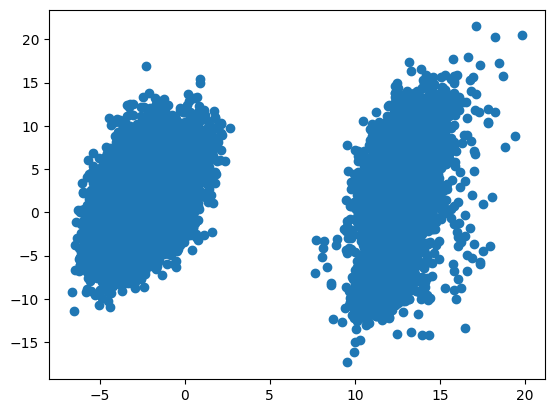

In [ ]:
plt.scatter(df22[0],df22[1])


In [ ]:
df11=famd.column_coordinates_
df11.index

Index(['age', 'balance', 'campaign', 'contact', 'day', 'default', 'duration',
       'education', 'housing', 'job', 'loan', 'marital', 'month', 'pdays',
       'poutcome', 'prev_contacted', 'previous', 'subscribed'],
      dtype='object', name='variable')

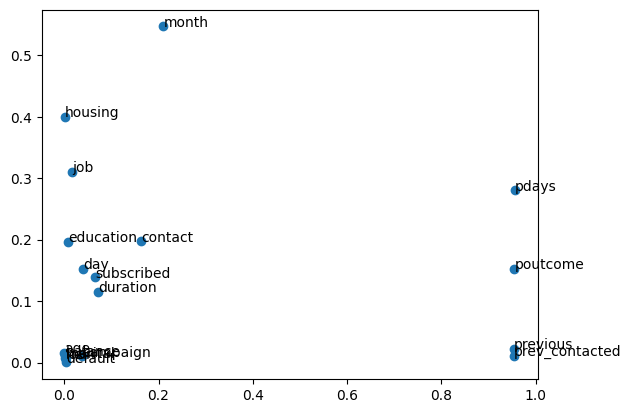

In [ ]:
plt.scatter(df11[0],df11[1])
#label each point of scatter
for i, txt in enumerate(df11.index):
    plt.annotate(txt, (df11[0][i],df11[1][i]))
plt.show()

# Clustering

have high tendancy to cluster

### Creating new data Frame x with num values and cat values without subscribe

In [ ]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed', 'prev_contacted'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36154 entries, 1052 to 12863
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36154 non-null  float64
 1   job             36154 non-null  object 
 2   marital         36154 non-null  object 
 3   education       36154 non-null  object 
 4   default         36154 non-null  object 
 5   balance         36154 non-null  float64
 6   housing         36154 non-null  object 
 7   loan            36154 non-null  object 
 8   contact         36154 non-null  object 
 9   day             36154 non-null  object 
 10  month           36154 non-null  object 
 11  duration        36154 non-null  int64  
 12  campaign        36154 non-null  int64  
 13  pdays           36154 non-null  int64  
 14  previous        36154 non-null  int64  
 15  poutcome        36154 non-null  object 
 16  subscribed      36154 non-null  object 
 17  prev_contacted  36154 non-null  o

In [ ]:
#Getting the list of Numerical and Categorical Variables
num_cols = df_train._get_numeric_data().columns
print (num_cols)


Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [ ]:
cols = df_train.columns
cat_cols = list(set(cols) - set(num_cols))
print(cat_cols)
cat_cols.remove('subscribed')
print(cat_cols)

['education', 'default', 'housing', 'loan', 'job', 'day', 'prev_contacted', 'month', 'marital', 'contact', 'poutcome', 'subscribed']
['education', 'default', 'housing', 'loan', 'job', 'day', 'prev_contacted', 'month', 'marital', 'contact', 'poutcome']


In [ ]:
data_clust = num_cols.tolist() + cat_cols
data_clust

['age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'education',
 'default',
 'housing',
 'loan',
 'job',
 'day',
 'prev_contacted',
 'month',
 'marital',
 'contact',
 'poutcome']

In [ ]:
X = df_train[data_clust]

# Get the index values of the categorical columns
Xcat_indices = [X.columns.get_loc(col) for col in cat_cols]
print(Xcat_indices)

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [ ]:
X

,age,balance,duration,campaign,pdays,previous,education,default,housing,loan,job,day,prev_contacted,month,marital,contact,poutcome
1052,27.0,671.0,332,2,-1,0,secondary,no,yes,no,student,7,no,may,single,unknown,nonexistent
18264,56.0,208.0,84,6,-1,0,secondary,no,no,yes,management,31,no,jul,married,telephone,nonexistent
45131,47.0,0.0,508,1,-1,0,tertiary,no,no,no,management,27,no,oct,married,cellular,nonexistent
31424,50.0,0.0,689,2,-1,0,secondary,no,yes,no,services,27,no,mar,married,cellular,nonexistent
37042,28.0,431.0,68,2,363,2,primary,no,yes,no,blue-collar,13,yes,may,single,cellular,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18890,46.0,0.0,343,1,-1,0,unknown,no,no,no,unknown,4,no,aug,married,cellular,nonexistent
33375,40.0,576.0,114,3,-1,0,secondary,no,yes,yes,admin.,20,no,apr,single,cellular,nonexistent
6283,34.0,-76.0,170,1,-1,0,secondary,no,yes,no,blue-collar,27,no,may,married,unknown,nonexistent
15687,32.0,71.0,221,8,-1,0,tertiary,no,yes,no,management,21,no,jul,married,cellular,nonexistent


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36154 entries, 1052 to 12863
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36154 non-null  float64
 1   balance         36154 non-null  float64
 2   duration        36154 non-null  int64  
 3   campaign        36154 non-null  int64  
 4   pdays           36154 non-null  int64  
 5   previous        36154 non-null  int64  
 6   education       36154 non-null  object 
 7   default         36154 non-null  object 
 8   housing         36154 non-null  object 
 9   loan            36154 non-null  object 
 10  job             36154 non-null  object 
 11  day             36154 non-null  object 
 12  prev_contacted  36154 non-null  object 
 13  month           36154 non-null  object 
 14  marital         36154 non-null  object 
 15  contact         36154 non-null  object 
 16  poutcome        36154 non-null  object 
dtypes: float64(2), int64(4), object(1

#### converting numerical columns in X to float

In [ ]:
for col in X.columns:
  if X[col].dtype == 'int':
      X[col] = X[col].astype('float')
print(X.dtypes)

age               float64
balance           float64
duration            int64
campaign            int64
pdays               int64
previous            int64
education          object
default            object
housing            object
loan               object
job                object
day                object
prev_contacted     object
month              object
marital            object
contact            object
poutcome           object
dtype: object


### Gower distance

In [ ]:
pip install gower


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gower


In [ ]:
# Compute Gower's distance matrix
gower_dist = gower.gower_matrix(X)


In [ ]:
gower_dist

### DB-scan with gower distance

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=34, metric='precomputed').fit(gower_dist)
labels = dbscan.labels_


In [ ]:
labels

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

### K medioids

In [ ]:
!pip install scikit-learn-extra

In [ ]:

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to {}-th nearest neighbor'.format(k))
plt.axhline(y=0.025, color='r', linestyle='--')  # Add a horizontal line at the chosen epsilon
plt.grid(True)
plt.show()

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score


costs = []

for n_clusters in list(range(1,7)):
    kmedoids = KMedoids(n_clusters=n_clusters, metric='precomputed', random_state=42)
    labels = kmedoids.fit_predict(gower_dist)
    #silhouette_avg = silhouette_score(gower_dist, labels, metric='precomputed')
    #sil_scores.append(silhouette_avg)
    costs.append(kmedoids.inertia_)



plt.plot(costs, marker='o')
plt.xlabel('K')
plt.ylabel('cost')
plt.ylim((0,11000))
plt.show

### references:
* https://www.codemotion.com/magazine/ai-ml/machine-learning/clustering-python-patterns/
* https://www.kaggle.com/code/rohanadagouda/unsupervised-learning-using-k-prototype-and-dbscan
* https://medium.com/@reddyyashu20/k-means-kmodes-and-k-prototype-76537d84a669
* https://github.com/aryancodify/Clustering/blob/master/K-Prototype%2Bclustering.ipynb
* https://antonsruberts.github.io/kproto-audience/
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
* https://www.kaggle.com/code/halflingwizard/clustering-categorical-data-using-gower-distance
* https://medium.com/analytics-vidhya/customer-segmentation-using-k-prototypes-algorithm-in-python-aad4acbaaede
* https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/
* https://medium.com/@MrBam44/how-to-evaluate-the-performance-of-clustering-algorithms-3ba29cad8c03

# Correspondence

In [ ]:
df_corr = df_train.loc[:,quants]
df_corr = df_corr.drop(columns=['pdays'],axis=1)
df_corr.head()

In [ ]:
df_corr_job = df_corr.join(df_train['job'])
df_corr_job.head()

# Factor Analysis

In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Standardize the combined data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Perform Factor Analysis
n_factors = 2  # Choose the number of factors
fa = FactorAnalysis(n_components=n_factors, random_state=0)
factors = fa.fit_transform(scaled_data)

# Create a DataFrame for the factors
factor_df = pd.DataFrame(factors, columns=[f'Factor{i+1}' for i in range(n_factors)])

# Display the factor loadings
loadings = pd.DataFrame(fa.components_.T, index=df_encoded.columns, columns=[f'Factor{i+1}' for i in range(n_factors)])

print("Factor Loadings:\n", loadings)

* Factor 1 is highly related with pdays, poutcome_nonexistent,prev_contacted_no,prev_contacted_yes (some negatively some positively) . so factor 1 is something related with previous outcomes.
* Factor 2 is strongly related with housing_no, housing_yes negatively and positively . so factor 2 maybe something related with housing loan

In [ ]:
print(factor_df.shape)

In [ ]:
plt.figure(figsize=(10, 8))
plt.hexbin(factor_df['Factor1'], factor_df['Factor2'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.title('Factor Analysis Results - Hexbin Plot')
plt.show()




In [ ]:
# Plotting the factors
plt.figure(figsize=(10, 8))
plt.scatter(factor_df['Factor1'], factor_df['Factor2'])
for i, txt in enumerate(df_train.index):
    plt.annotate(txt, (factor_df['Factor1'][i], factor_df['Factor2'][i]),fontsize=15)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis')
plt.grid(True)
plt.show()


* here i assume , that even though we see only 4 points within that area there are many data points as it can be see from Hexbin plot as the light color points indicate high counts , so approximately if we sum up those values we get 36154 (no.of observations) . and also in this scatter plot the text annotation indicate something similar.